## Progetto ML 2023/2024 - Elaborazione dati

In [2]:
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import AffinityPropagation
from sklearn.cluster import AgglomerativeClustering
from sklearn.neighbors import NearestCentroid
from sklearn.cluster import DBSCAN
from sklearn.cluster import OPTICS
from sklearn.cluster import cluster_optics_dbscan
import seaborn as sns
import matplotlib.gridspec as gridspec
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import pandas as pd
import os
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from scipy.sparse import csr_matrix
from sklearn.cluster import KMeans
from sklearn.neighbors import NearestNeighbors
import seaborn as sns




In [3]:
#lettura dati e pulizia dati con numero di votazioni troppo basse

dataset_google_reviews = pd.read_csv(os.path.join('.', "google_review_ratings.csv"))
dataset_google_reviews_training = pd.read_csv(os.path.join('.', "training.csv"))
dataset_google_reviews_test = pd.read_csv(os.path.join('.', "test.csv"))
dataset_google_reviews = dataset_google_reviews.set_index('User')
dataset_google_reviews_training = dataset_google_reviews_training.set_index('User')
dataset_google_reviews_test = dataset_google_reviews_test.set_index('User')
dataset_google_reviews.replace(0, np.nan, inplace=True)
data_set_shape = dataset_google_reviews.shape
dataset_google_reviews.dropna(thresh = data_set_shape[1]/2, axis=0, inplace=True)
dataset_google_reviews.dropna(thresh = 500, axis=1, inplace=True)
dataset_google_reviews.replace(np.nan, 0, inplace=True)

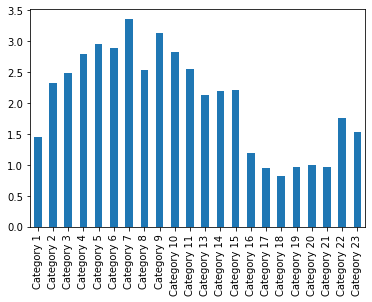

In [4]:
# vediamo la media delle votazioni per ogni categoria per capire quale tipo di scaler utilizzare

dataset_google_reviews.mean().plot(kind='bar')

In [5]:
# possiamo vedere che la media dei voti per ogni categoria è molto diversa, pertanto utilizzeremo un minmax scaler
# per tener conto di queste differenze nel range delle votazioni per categoria

# assumendo che la media per categoria 0.0 per ogni user equivale che un user non abbia votato nulla in quella categoria, eliminiamo
# le categorie e gli user con un numero di votazioni troppo basso
# in piu eliminiamo righe e colonne con un numero di votazioni/votazioni uguali a zero superiori alla metà

### Dati Scalati

In [6]:
minMaxScaler = MinMaxScaler()
dataset_google_reviews = pd.DataFrame(minMaxScaler.fit_transform(dataset_google_reviews), columns=dataset_google_reviews.columns, index=dataset_google_reviews.index)
dataset_google_reviews_training = pd.DataFrame(minMaxScaler.fit_transform(dataset_google_reviews_training), columns=dataset_google_reviews_training.columns, index=dataset_google_reviews_training.index)
dataset_google_reviews_test = pd.DataFrame(minMaxScaler.fit_transform(dataset_google_reviews_test), columns=dataset_google_reviews_test.columns, index=dataset_google_reviews_test.index)

In [7]:
#model_scaled = TSNE(n_components = 2, random_state = 0, perplexity =  20)
#tsne_data_scaled = model_scaled.fit_transform(dataset_google_reviews)
#plt.figure(figsize = (14, 14))
#plt.scatter(tsne_data_scaled[:,0], tsne_data_scaled[:,1])
#plt.show()

In [8]:
#vediamo la variazione di varianza all'aumentare del numero di componenti pca per capire se possiamo fare feature selection e riduzione
#della dimensionalità

In [9]:
def grafico_varianza_pca(dataframe):
    
    figure = plt.figure(figsize = (9, 9))
    pca = PCA().fit(dataframe)
    plt.plot(np.cumsum(pca.explained_variance_ratio_))
    plt.xlabel('numero componenti')
    plt.ylabel('varianza');
    plt.show()
    
    axx = plt.subplot()
    axx.set_xlim([10,24])
    axx.plot(np.cumsum(pca.explained_variance_ratio_))

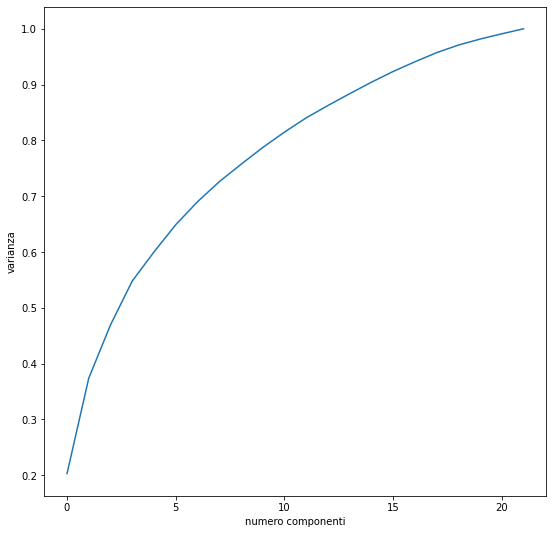

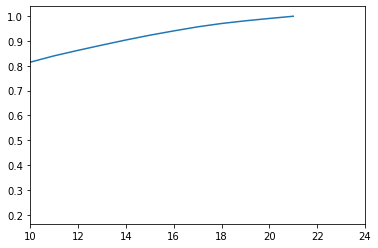

In [10]:
grafico_varianza_pca(dataset_google_reviews)

In [11]:
## se vogliamo applicare riduzione della dimensionalità con PCA per preservare il 90 pecento della varianza, utilizziamo un  numero di componenti pari a 15 togliendone 8

In [12]:
def applica_pca(df, num_components):
    pca15 = PCA(n_components=num_components)
    dataset_google_reviews_copy_reduct = pd.DataFrame(pca15.fit_transform(df))
    dataset_google_reviews_copy_reduct.index = 'User ' + (dataset_google_reviews_copy_reduct.index + 1).astype(str)
    dataset_google_reviews_copy_reduct.columns = 'Category ' + (dataset_google_reviews_copy_reduct.columns + 1).astype(str)
    return dataset_google_reviews_copy_reduct

In [13]:
dataset_google_reviews_copy_reduct = applica_pca(dataset_google_reviews, 15)

In [14]:
## Proviamo a trovare dei cluster, troviamo innanzitutto il numero di cluster ottimali mediante il metodo elbow

In [15]:
def elbow_method(dataframe2):
    inertia = []
    K = range(1,12)
    for k in K:
        kmeanModel = KMeans(n_clusters=k).fit(dataframe2)
        inertia.append(kmeanModel.inertia_)

    plt.figure(figsize=(7,7))
    plt.plot(K, inertia, 'bx-')
    plt.xlabel('k')
    plt.ylabel('Inertia')
    plt.show()
    


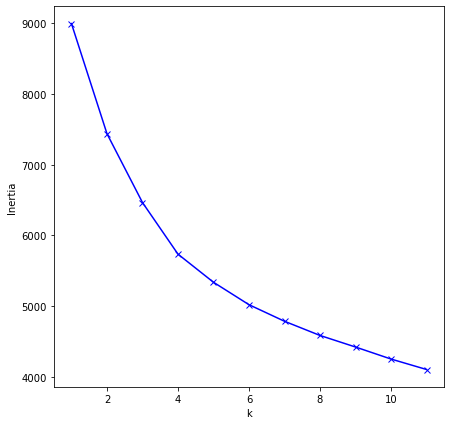

In [16]:
elbow_method(dataset_google_reviews_copy_reduct)

In [17]:
# il numero di cluster ottimale sembra essere 5 o 6, scegliamo 5

In [18]:
#dataset_google_reviews_copy = dataset_google_reviews_copy_reduct.copy()
#kmeans = KMeans(n_clusters= 6)
#label = kmeans.fit_predict(dataset_google_reviews_copy)
#dataset_google_reviews_copy["Cluster"] = label
#pd.tools.plotting.parallel_coordinates(data, 'cluster')

In [19]:
#dataset_google_reviews_copy = dataset_google_reviews_copy_reduct.copy()
#tsne3 = TSNE(n_components = 3, random_state = 0, perplexity =  20)
#kmeans = KMeans(n_clusters=6)
#label = kmeans.fit_predict(dataset_google_reviews_copy)

#model_scaled = TSNE(n_components = 2, random_state = 0, perplexity =  20)
#tsne_data_scaled = model_scaled.fit_transform(dataset_google_reviews)

In [20]:
#pca = PCA(n_components = 2,random_state=42)
#df_PCA_scaled = pca.fit_transform(dataset_google_reviews)

#model = KMeans(n_clusters=4,random_state=42)
#model.fit(df_PCA_scaled)
#cluster = model.labels_
#coeff = np.transpose(pca.components_[0:2, :])
#n = coeff.shape[0]
#labels = list(dataset_google_reviews.columns)


In [21]:
#pca.components_[0:2, :].shape
def mouse_move(event):
    x, y = event.xdata, event.ydata
    print(x, y)

In [59]:
def clustering_kmeans(df,n_clusters,n_components=3,titolo=''):
    
    dataset_google_reviews_copy = df.copy()
    
    pca3 = PCA(n_components=n_components)
    
    #coeff = np.transpose(pca.components_[0:3, :])
    #n = coeff.shape[0]
    #labels = list(df.columns)
    
    kmeans = KMeans(n_clusters=n_clusters)
    label_clustering = kmeans.fit_predict(dataset_google_reviews_copy)
    
    nc2 = NearestCentroid()
    nc2.fit(dataset_google_reviews_copy, label_clustering)
    centroidi2 = nc2.centroids_

    dataset_google_reviews_copy["Cluster"] = label_clustering
    PCs_3d = pd.DataFrame(pca3.fit_transform(dataset_google_reviews_copy.drop(["Cluster"], axis=1)))
    
    centers = pca3.fit_transform(kmeans.cluster_centers_)
    
    colonne=[]
    
    for i in range(n_components):
        colonne.append("PC{}_3d".format(i+1))
        
    
    PCs_3d.columns = colonne
    #print(PCs_3d)
    PCs_3d.index = 'User ' + (PCs_3d.index + 1).astype(str)
    dataset_google_reviews_copy = pd.concat([dataset_google_reviews_copy,PCs_3d], axis=1, join='inner')
    #cluster0 = dataset_google_reviews_copy[dataset_google_reviews_copy["Cluster"] == 0]
    #cluster1 = dataset_google_reviews_copy[dataset_google_reviews_copy["Cluster"] == 1]
    #cluster2 = dataset_google_reviews_copy[dataset_google_reviews_copy["Cluster"] == 2]
    #cluster3 = dataset_google_reviews_copy[dataset_google_reviews_copy["Cluster"] == 3]
    #cluster4 = dataset_google_reviews_copy[dataset_google_reviews_copy["Cluster"] == 4]
    #cluster5 = dataset_google_reviews_copy[dataset_google_reviews_copy["Cluster"] == 5]

    #Plot
    
    colors = ['#DF2020', '#81DF20', '#4dabe6', '#FF66FF', '#804000', '#b3b300', '#669999']
    dataset_google_reviews_copy['c'] = dataset_google_reviews_copy['Cluster'].map({0:colors[0], 1:colors[1], 2:colors[2], 3:colors[3], 4:colors[4], 
                                                       5:colors[5], 6:colors[6]})
    
    #print(dataset_google_reviews_copy['c'])

    plt.figure(figsize = (18, 18))
    
    if n_components == 3:
        
        ax = plt.axes(projection ="3d")
        ax.scatter3D(dataset_google_reviews_copy["PC1_3d"], 
                     dataset_google_reviews_copy["PC2_3d"], 
                     dataset_google_reviews_copy["PC3_3d"],
                     marker=".",
                     s=30,
                     c=dataset_google_reviews_copy['c'])
        #print(centers.shape)
        #ax.scatter(xs=centers[:, 0], ys=centers[:, 1], zs=centers[:, 2], c='red', s=500);
        ax.scatter(xs=centroidi2[:,0], ys=centroidi2[:,1], zs=centroidi2[:, 2], color='black',s=400)
        ax.set_xlabel("PC1")
        ax.set_ylabel("PC2")
        ax.set_zlabel("PC3")
        ax.set_title(titolo,y=1.05, fontsize=20);
        #ax.savefig('Clustering Result.png')  
    
    else:
        
        plt.scatter(dataset_google_reviews_copy["PC1_3d"], dataset_google_reviews_copy["PC2_3d"], marker=".", c=dataset_google_reviews_copy['c'])
        plt.scatter(centers[:, 0], centers[:, 1], color='black',s=400);
        plt.set_xlabel("PC1")
        plt.set_ylabel("PC2")
        plt.set_title(titolo, y=1.05, fontsize=20);
        
        
    #for i in range(n):
        #plt.arrow(0, 0, coeff[i,0], coeff[i,1],color = 'r',alpha = 0.5)
        #plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, coeff[i,2] * 1.15, labels[i], color = 'g', ha = 'center', va = 'center')
        
    
        
    
    #trace1 = ax.scatter3D(dataset_google_reviews_copy["PC1_3d"], 
                          #dataset_google_reviews_copy["PC2_3d"], 
                          #dataset_google_reviews_copy["PC3_3d"], c=label_clustering)

    #trace2 = ax.scatter3D(cluster1["PC1_3d"], cluster1["PC2_3d"], cluster1["PC3_3d"], c='blue')

    #trace3 = ax.scatter3D(cluster2["PC1_3d"], cluster2["PC2_3d"], cluster2["PC3_3d"], c='red')

    #trace4 = ax.scatter3D(cluster3["PC1_3d"], cluster3["PC2_3d"], cluster3["PC3_3d"], c='yellow')

    #trace5 = ax.scatter3D(cluster4["PC1_3d"], cluster4["PC2_3d"], cluster4["PC3_3d"], c='green')

    #trace6 = ax.scatter3D(cluster5["PC1_3d"], cluster5["PC2_3d"], cluster5["PC3_3d"], c='violet')
    



In [60]:
def clustering_agglomerativo(df,n_clusters,link='complete',n_components=3,titolo=''):
    
    dataset_google_reviews_copy = df.copy()
    
    pca3 = PCA(n_components=n_components)
    
    ag = AgglomerativeClustering(n_clusters=n_clusters, affinity ='cosine', linkage=link)
    labels_ac = ag.fit_predict(dataset_google_reviews_copy)
    
    nc = NearestCentroid()
    nc.fit(dataset_google_reviews_copy, labels_ac)
    centroidi = nc.centroids_

    dataset_google_reviews_copy["Cluster"] = labels_ac
    PCs_3d = pd.DataFrame(pca3.fit_transform(dataset_google_reviews_copy.drop(["Cluster"], axis=1)))
    
    colonne=[]
    
    for i in range(n_components):
        colonne.append("PC{}_3d".format(i+1))
        
    
    PCs_3d.columns = colonne
    PCs_3d.index = 'User ' + (PCs_3d.index + 1).astype(str)
    dataset_google_reviews_copy = pd.concat([dataset_google_reviews_copy,PCs_3d], axis=1, join='inner')

    #Plot
    
    colors = ['#DF2020', '#81DF20', '#4dabe6', '#FF66FF', '#804000', '#b3b300', '#669999']
    dataset_google_reviews_copy['c'] = dataset_google_reviews_copy['Cluster'].map({0:colors[0], 1:colors[1], 2:colors[2], 3:colors[3], 4:colors[4], 
                                                       5:colors[5], 6:colors[6]})

    plt.figure(figsize = (18, 18))
    
    if n_components == 3:
        
        ax = plt.axes(projection ="3d")
        ax.scatter3D(dataset_google_reviews_copy["PC1_3d"], 
                     dataset_google_reviews_copy["PC2_3d"], 
                     dataset_google_reviews_copy["PC3_3d"],
                     marker=".",
                     s=30,
                     c=dataset_google_reviews_copy['c'])
        ax.scatter(xs=centroidi[:,0], ys=centroidi[:,1], zs=centroidi[:, 2], color='black',s=400)
        ax.set_xlabel("PC1")
        ax.set_ylabel("PC2")
        ax.set_zlabel("PC3")
        ax.set_title(titolo,y=1.05, fontsize=20);
    
    else:
        
        plt.scatter(dataset_google_reviews_copy["PC1_3d"], dataset_google_reviews_copy["PC2_3d"], marker=".", c=dataset_google_reviews_copy['c'])
        centers = kmeans.cluster_centers_
        plt.scatter(centroidi[:, 0], centroidi[:, 1], color='black',s=400);
        plt.set_xlabel("PC1")
        plt.set_ylabel("PC2")
        plt.set_title(titolo, y=1.05, fontsize=20);
        
    
    plt.connect('motion_notify_event', mouse_move)
    plt.axis('equal')
    plt.show()
        

NotImplementedError: It is not currently possible to manually set the aspect on 3D axes

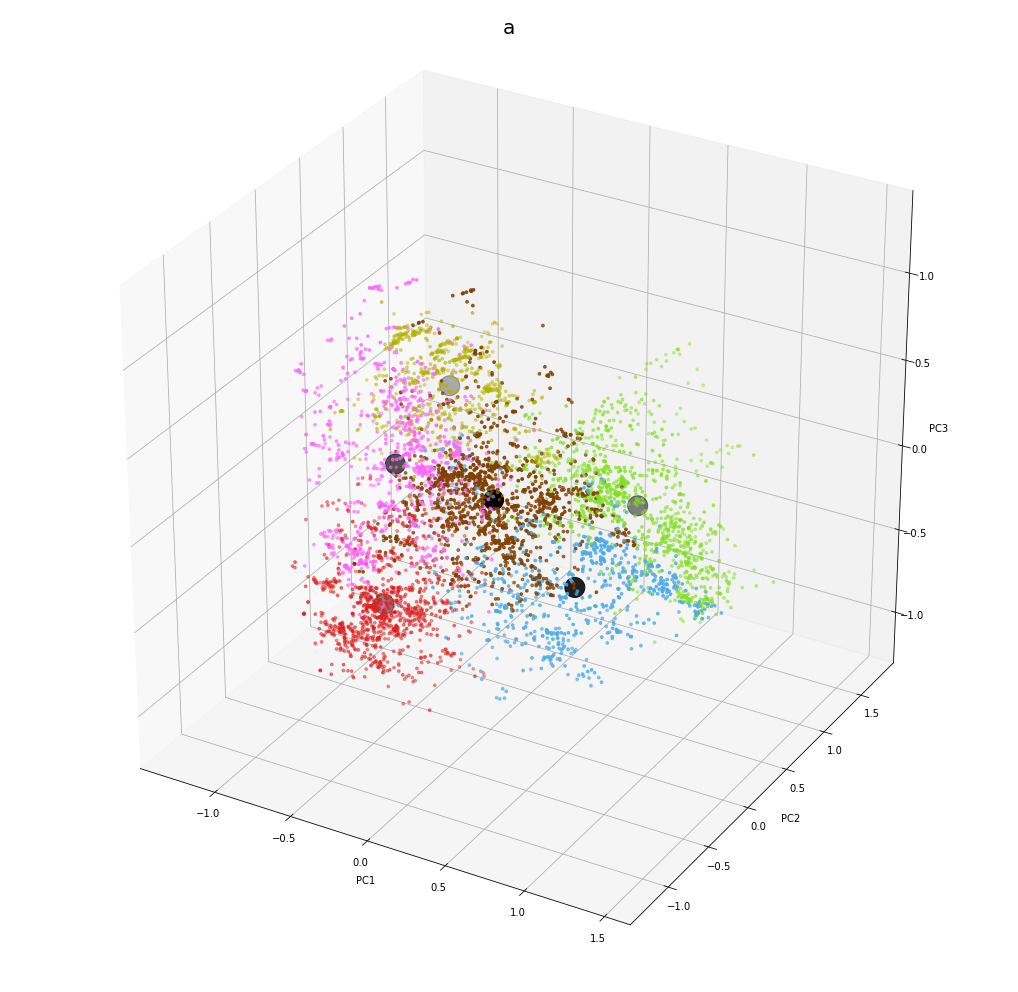

In [61]:
clustering_kmeans(dataset_google_reviews_copy_reduct,6,3,titolo='a')

In [25]:
#kmeans = KMeans(n_clusters= 6)

#dataset_google_reviews_scaled_pca = pca3.fit_transform(dataset_google_reviews)

#label2 = kmeans.fit_predict(dataset_google_reviews_scaled_pca)

#centers = kmeans.cluster_centers_

#plt.figure(figsize = (14, 14))

#ax = plt.axes(projection ="3d")

#ax.scatter3D(xs=dataset_google_reviews_scaled_pca[:, 0], ys=dataset_google_reviews_scaled_pca[:, 1], zs=dataset_google_reviews_scaled_pca[:, 2],
                    #c=label2)

#plt.scatter(dataset_google_reviews_scaled_pca[:, 0], dataset_google_reviews_scaled_pca[:, 1], c=label, s=50, cmap='viridis')

#ax.scatter3D(xs=centers[:, 0], ys=centers[:, 1], zs=centers[:, 2], c='black', alpha=0.5);

In [26]:
#label_tsne = kmeans.fit_predict(tsne_data_scaled)

In [27]:
#model_scaled = TSNE(n_components = 3, random_state = 0, perplexity =  45)
#tsne_data_scaled = model_scaled.fit_transform(dataset_google_reviews)

#label3 = kmeans.fit_predict(tsne_data_scaled)

#centers = kmeans.cluster_centers_

#plt.figure(figsize = (14, 14))

#ax = plt.axes(projection ="3d")

#ax.scatter3D(xs=tsne_data_scaled[:, 0], ys=tsne_data_scaled[:, 1], zs=tsne_data_scaled[:, 2],
                    #c=label3)

#plt.scatter(dataset_google_reviews_scaled_pca[:, 0], dataset_google_reviews_scaled_pca[:, 1], c=label, s=50, cmap='viridis')

#ax.scatter3D(xs=centers[:, 0], ys=centers[:, 1], zs=centers[:, 2], c='black', alpha=0.5);

In [28]:
#model_scaled = TSNE(n_components = 3, random_state = 0, perplexity =  20)

#tsne_data_scaled = model_scaled.fit_transform(dataset_google_reviews)

#plt.figure(figsize = (14, 14))
#plt.scatter(tsne_data_scaled[:, 0], tsne_data_scaled[:, 1], c=label_tsne, s=50, cmap='viridis')

#centers = kmeans.cluster_centers_
#plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

## Sistema di raccomandazione

#### Visualizzazione dati

In [29]:
def trovaSimili(k,model):
    return model.kneighbors([k])

In [30]:
def trovaCategorieSimili(u,model,data):
    
    data = data.T     
    _, indici_simili = trovaSimili(data.loc[u],model)
    indici_simili = indici_simili[0,1:]
    return list(map(lambda x: data.iloc[[x]].index[0],indici_simili.flatten().tolist()))

In [31]:
def trovaSimiliA(u,model,data, type='item'):
    
    if type=='item':
        data = data.T
        
    dist, indici_simili = trovaSimili(data.loc[u],model)
    dist, indici_simili = dist[0, 1:], indici_simili[0,1:]
    
    return dist, indici_simili

In [32]:
#simili

In [33]:
#tentiamo lo stesso approccio predicendo prima i voti non dati dagli utenti su alcune categorie
#addestriamo il modello con la matrice sparsa trasposta categoria-user e prediciamo sulla base item-based

In [34]:
#modello_cat = NearestNeighbors(n_neighbors=5, metric='cosine', algorithm='brute', n_jobs=-1)

#modello_cat.fit(dataset_google_reviews.T.values)

In [35]:
# trova vicini per ogni riga del test set

#similicat = dict()

#for i in dataset_google_reviews.T.index:
    #print(dataset_google_reviews_test.T.loc[i])
    #_, indici_simili_cat = trovaSimili(dataset_google_reviews.T.loc[i], modello_cat)
    #simili[i] = list(map(lambda x: dataset_google_reviews.T.iloc[[x]].index[0],indici_simili_cat.flatten().tolist()))

In [36]:
#similiA = trovaCategorieSimili('Category 1',modello_cat,dataset_google_reviews)

In [37]:
#dist, ind_sim = trovaSimili(dataset_google_reviews.loc['User 1'], modello)

In [38]:
#sim_cat = indices[i].tolist()

In [39]:
#distances, indices = model.kneighbors(dataset_google_reviews.T.values, n_neighbors=5)

In [40]:
def predici_categorie_novote_user_no_rec(u,data):
    

    

    #computa matrice di similarita
    model = NearestNeighbors(metric='cosine', algorithm='brute')
    model.fit(dataset_google_reviews.T.values)
    distances, indices = model.kneighbors(dataset_google_reviews.T.values, n_neighbors=5)
    index_user = dataset_google_reviews.index.tolist().index(u)

    for i,k in list(enumerate(dataset_google_reviews)):
    
                
        if dataset_google_reviews.T.iloc[i, index_user] == 0:
                
                    sim_cat = indices[i].tolist()
                    cat_distances = distances[i].tolist()
                
                    if i in sim_cat:
                        id_cat = sim_cat.index(i)
                        sim_cat.remove(i)
                        cat_distances.pop(id_cat)
                
                    cat_similarity = [1-x for x in cat_distances]
                    cat_similarity_copy = cat_similarity.copy()
                    nominatore = 0
                    for s in range(0, len(cat_similarity)):
                        #print(sim_cat[s])
                        if dataset_google_reviews.T.iloc[sim_cat[s], index_user] == 0:
                            if len(cat_similarity_copy) == 4:
                              cat_similarity_copy.pop(s)
                            else:
                              cat_similarity_copy.pop(s-(len(cat_similarity)-len(cat_similarity_copy)))
                        else:
                            nominatore = nominatore + cat_similarity[s]*dataset_google_reviews.T.iloc[sim_cat[s],index_user]
                    if len(cat_similarity_copy) > 0:
                        if sum(cat_similarity_copy) > 0:
                            predicted_r = nominatore/sum(cat_similarity_copy)
                        else:
                            predicted_r = 0
                    else:
                        predicted_r = 0
                
                    #print('predico categoria {} per user {} come: {}'.format(k, u, predicted_r))
                    data.loc[u,k] = predicted_r
                    


In [41]:
def predici_categorie_novote_user_rec(u,data):
    

    

    #computa matrice di similarita
    model = NearestNeighbors(metric='cosine', algorithm='brute')
    model.fit(data.T.values)
    distances, indices = model.kneighbors(data.T.values, n_neighbors=5)
    index_user = data.index.tolist().index(u)

    for i,k in list(enumerate(data)):
    
                
        if data.T.iloc[i, index_user] == 0:
                
                    sim_cat = indices[i].tolist()
                    cat_distances = distances[i].tolist()
                
                    if i in sim_cat:
                        id_cat = sim_cat.index(i)
                        sim_cat.remove(i)
                        cat_distances.pop(id_cat)
                
                    cat_similarity = [1-x for x in cat_distances]
                    cat_similarity_copy = cat_similarity.copy()
                    nominatore = 0
                    for s in range(0, len(cat_similarity)):
                        #print(sim_cat[s])
                        if data.T.iloc[sim_cat[s], index_user] == 0:
                            if len(cat_similarity_copy) == 4:
                              cat_similarity_copy.pop(s)
                            else:
                              cat_similarity_copy.pop(s-(len(cat_similarity)-len(cat_similarity_copy)))
                        else:
                            nominatore = nominatore + cat_similarity[s]*data.T.iloc[sim_cat[s],index_user]
                    if len(cat_similarity_copy) > 0:
                        if sum(cat_similarity_copy) > 0:
                            predicted_r = nominatore/sum(cat_similarity_copy)
                        else:
                            predicted_r = 0
                    else:
                        predicted_r = 0
                
                
                    data.loc[u,k] = predicted_r

In [42]:
def predici_categorie_novote_all_user_no_rec(data):
    dataset_google_reviews_copy_no_rec = dataset_google_reviews.copy()
    for k in dataset_google_reviews.index:
        predici_categorie_novote_user_no_rec(k, data)

In [43]:
def predici_categorie_novote_all_user_rec(data):
    for k in dataset_google_reviews.index:
        predici_categorie_novote_user_rec(k, data)

In [44]:
dataset_google_reviews_copy_rec = dataset_google_reviews.copy()
dataset_google_reviews_copy_no_rec = dataset_google_reviews.copy()

In [45]:
predici_categorie_novote_all_user_rec(dataset_google_reviews_copy_rec)

In [46]:
predici_categorie_novote_all_user_no_rec(dataset_google_reviews_copy_no_rec)

In [47]:
#applichiamo pca anche ai dataset con le votazioni predette
dataset_google_reviews_copy_no_rec = applica_pca(dataset_google_reviews_copy_no_rec, 15)
dataset_google_reviews_copy_rec = applica_pca(dataset_google_reviews_copy_rec, 15)

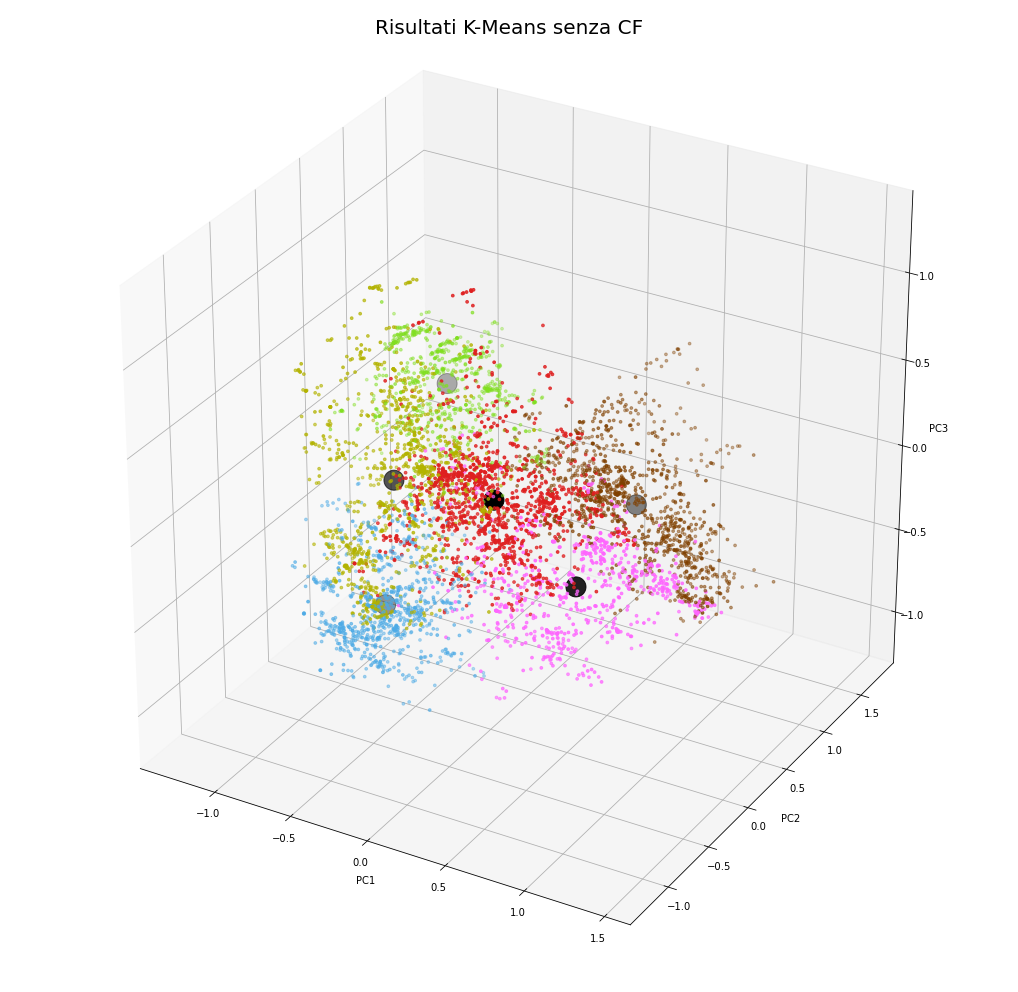

In [48]:
clustering_kmeans(dataset_google_reviews_copy_reduct,6,3,'Risultati K-Means senza CF')

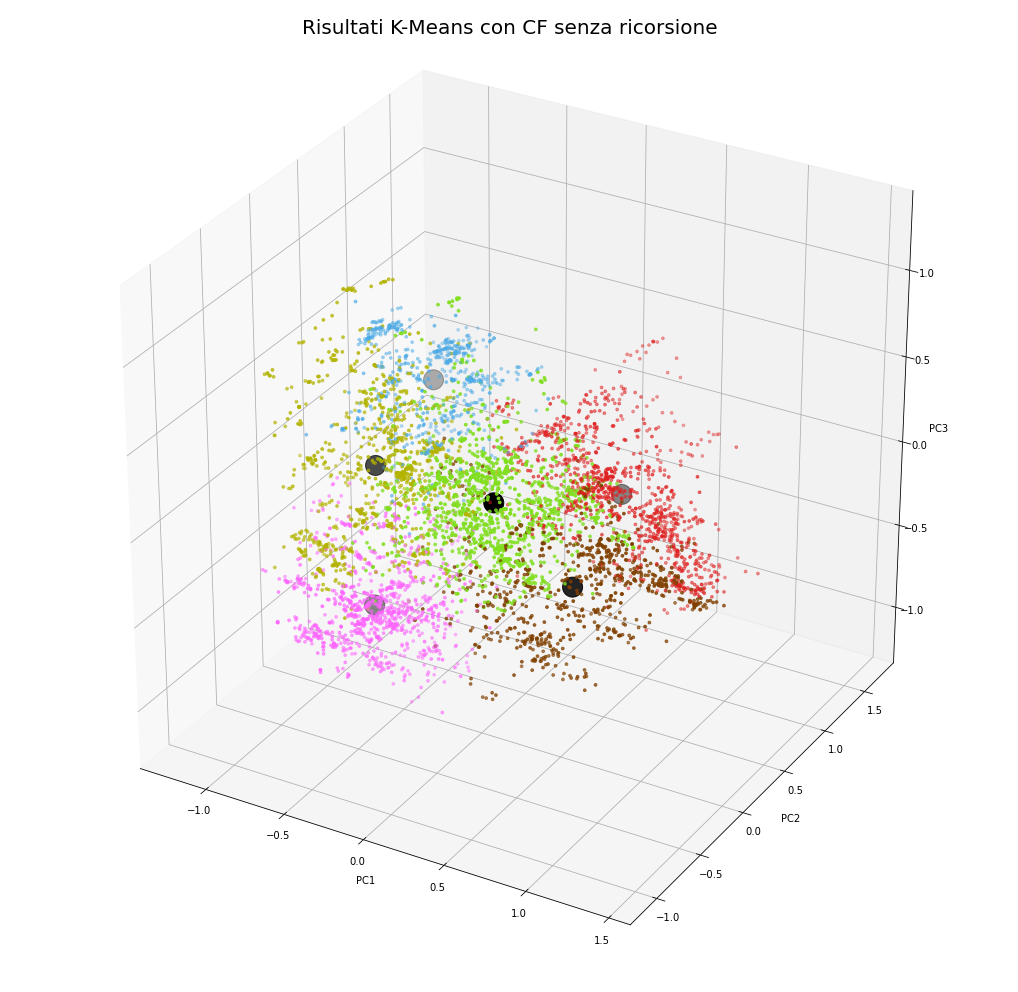

In [49]:
clustering_kmeans(dataset_google_reviews_copy_no_rec,6,3,'Risultati K-Means con CF senza ricorsione')
#clustering_kmeans(dataset_google_reviews_copy_no_rec, 'Risultati K-Means con CF senza ricorsione', 5, 3)

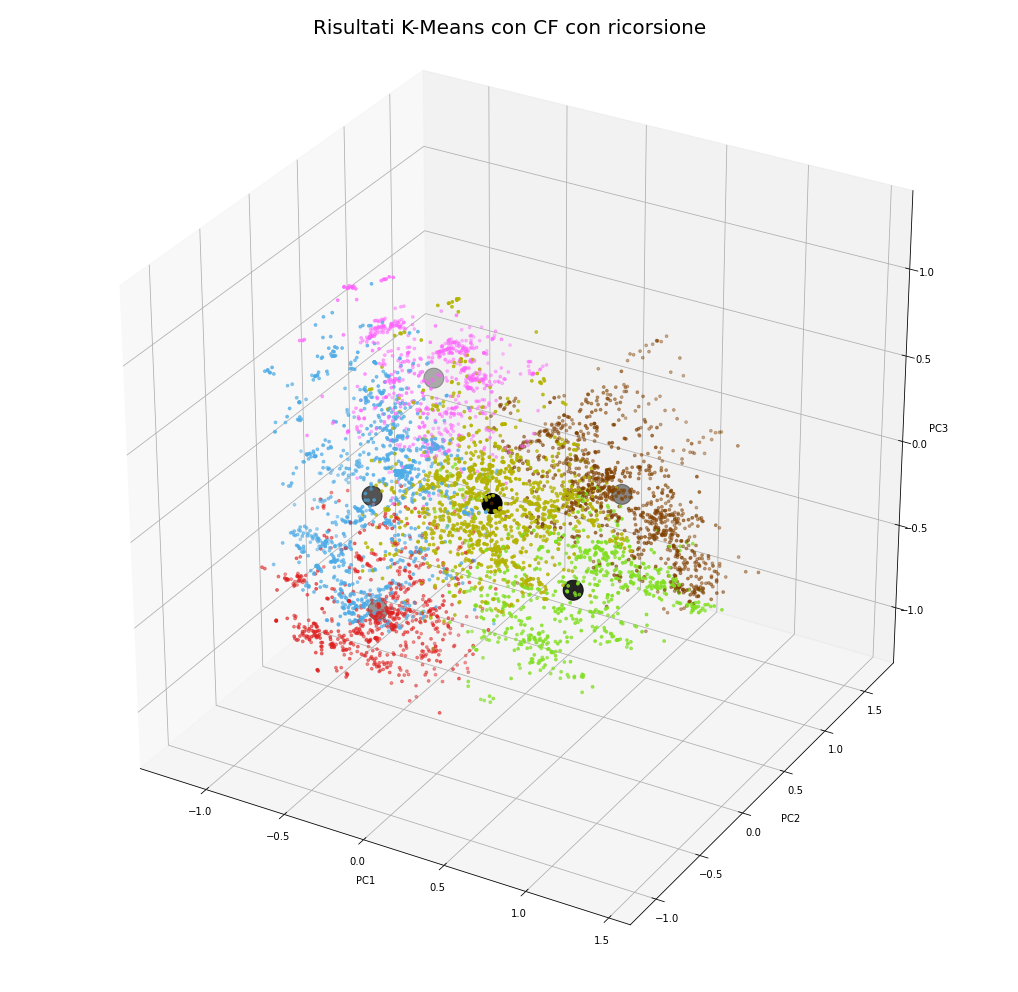

In [50]:
clustering_kmeans(dataset_google_reviews_copy_rec,6,3,'Risultati K-Means con CF con ricorsione')

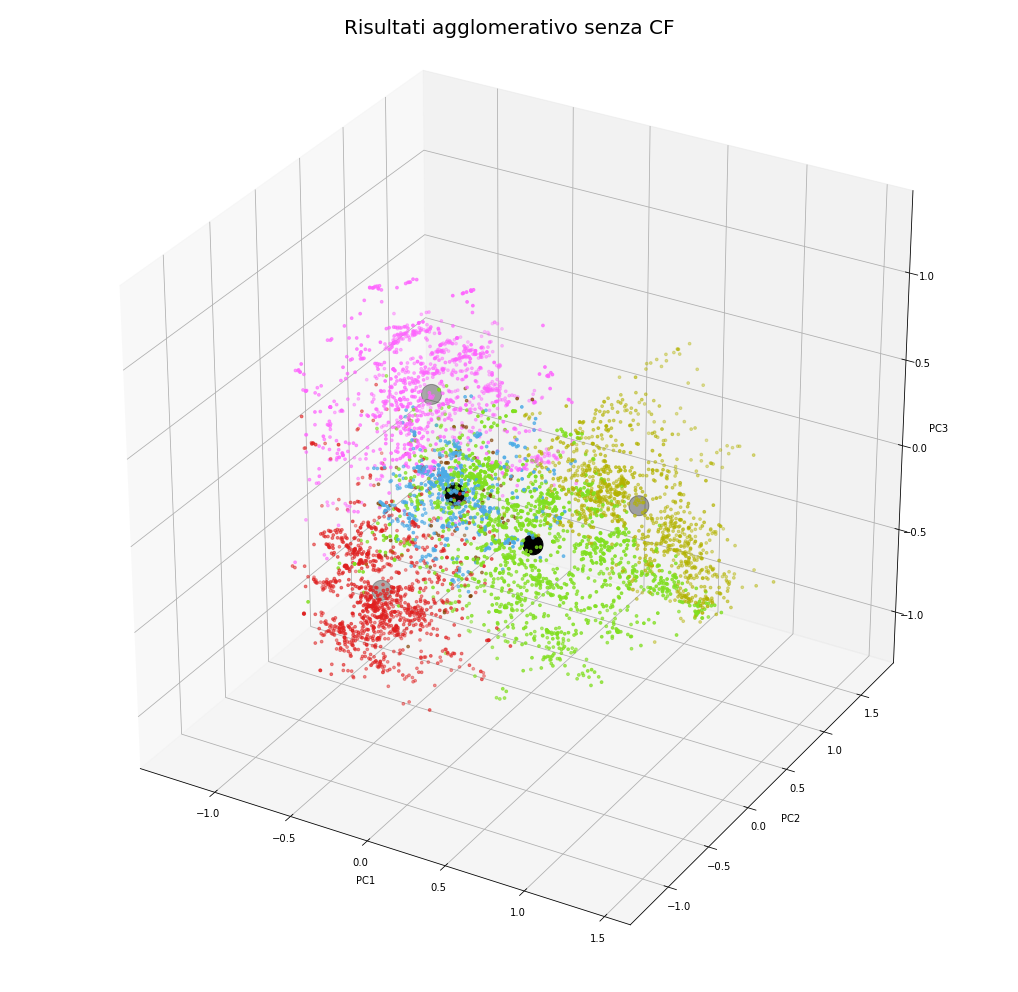

In [51]:
clustering_agglomerativo(dataset_google_reviews_copy_reduct,6,'average',3,'Risultati agglomerativo senza CF')

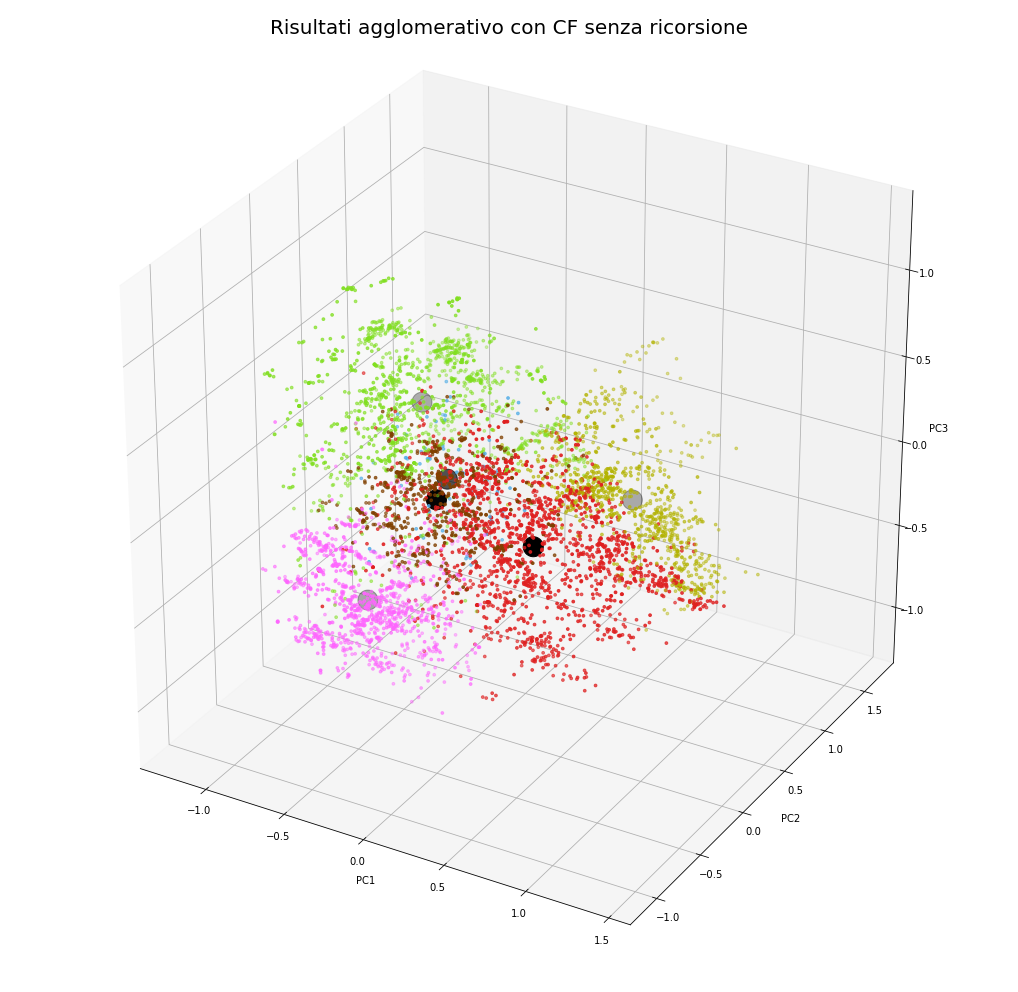

In [52]:
clustering_agglomerativo(dataset_google_reviews_copy_no_rec,6,'average',3,'Risultati agglomerativo con CF senza ricorsione')

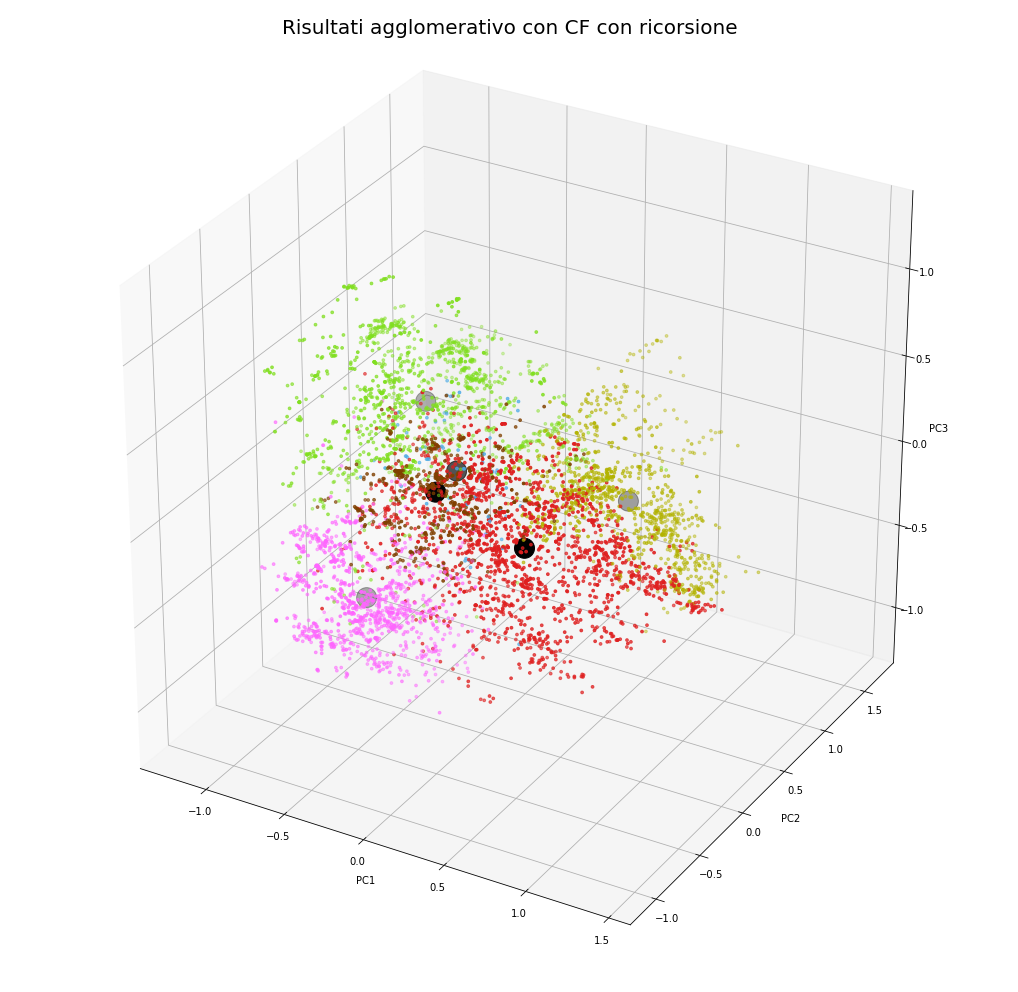

In [53]:
clustering_agglomerativo(dataset_google_reviews_copy_rec,6,'average',3,'Risultati agglomerativo con CF con ricorsione')

In [ ]:
#dataset_google_reviews_copy_no_rec_pca = pca.fit_transform(dataset_google_reviews_copy_no_rec)
#dataset_google_reviews_copy_rec_pca = pca.fit_transform(dataset_google_reviews_copy_rec)

In [ ]:
#label_no_rec = kmeans.fit_predict(dataset_google_reviews_copy_no_rec_pca)

In [ ]:
#label_rec = kmeans.fit_predict(dataset_google_reviews_copy_rec_pca)

In [ ]:
# clustering senza collaborative filtering

#plt.figure(figsize = (14, 14))
#plt.scatter(dataset_google_reviews_scaled_pca[:, 0], dataset_google_reviews_scaled_pca[:, 1], c=label, s=50, cmap='viridis')

#centers = kmeans.cluster_centers_
#plt.scatter(centers[:, 0], centers[:, 1], c='#c22604', s=200, alpha=1);

In [ ]:
# clustering con collaborative filtering senza ricorsione
#plt.figure(figsize = (14, 14))
#plt.scatter(dataset_google_reviews_copy_no_rec_pca[:, 0], dataset_google_reviews_copy_no_rec_pca[:, 1], c=label_no_rec, s=50, cmap='viridis')

#centers_no_rec_pca = kmeans.cluster_centers_
#plt.scatter(centers_no_rec_pca[:, 0], centers_no_rec_pca[:, 1], c='#c22604', s=200);

In [ ]:
# clustering con collaborative filtering con ricorsione
#plt.figure(figsize = (14, 14))
#plt.scatter(dataset_google_reviews_copy_rec_pca[:, 0], dataset_google_reviews_copy_rec_pca[:, 1], c=label_rec, s=50, cmap='viridis')

#centers_rec_pca = kmeans.cluster_centers_
#plt.scatter(centers_rec_pca[:, 0], centers_rec_pca[:, 1], c='#c22604', s=200);

In [515]:
# vediamo che alcuni punti specialmente nella versione ricorsiva vengono assegnati ad altri cluster, proviamo con altre tecniche di clustering 

In [516]:
#ag = AgglomerativeClustering(n_clusters=5)
#labels_ac_no_rec = ag.fit_predict(dataset_google_reviews_copy_no_rec_pca)

In [517]:
#nc = NearestCentroid()
#nc.fit(dataset_google_reviews_copy_no_rec_pca, labels_ac_no_rec)
#centroidi_no_rec_pca = nc.centroids_

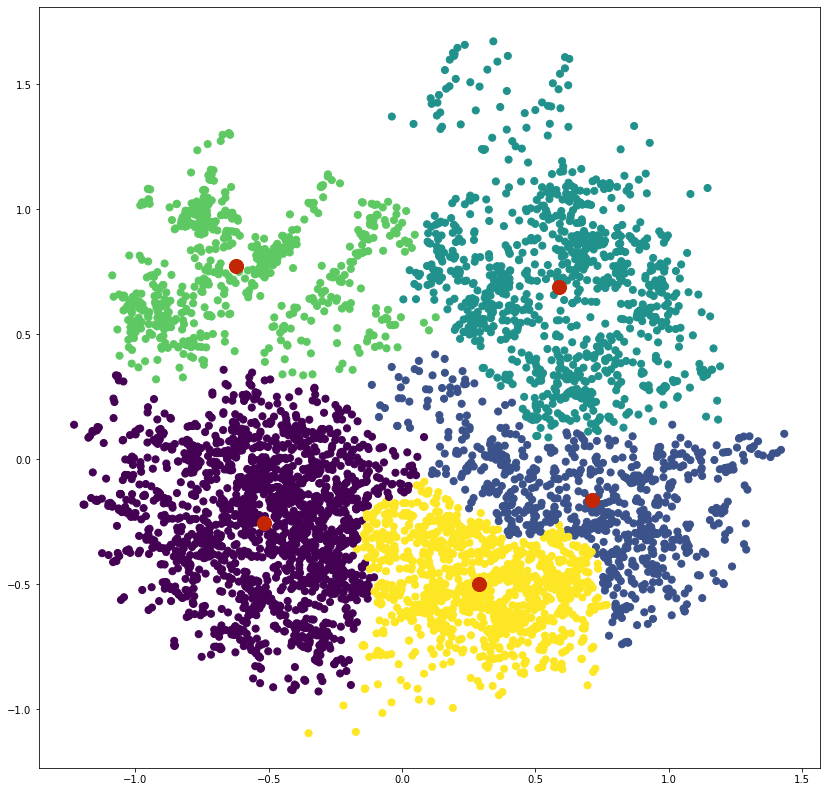

In [518]:
#plt.figure(figsize = (14, 14))
#plt.scatter(dataset_google_reviews_copy_no_rec_pca[:, 0], dataset_google_reviews_copy_no_rec_pca[:, 1], c=labels_ac_no_rec, s=50, cmap='viridis')
#plt.scatter(centroidi_no_rec_pca[:, 0], centroidi_no_rec_pca[:, 1], c='#c22604', s=200);

In [519]:
# vediamo che minimizzando la somma del quadrato delle distanze per ciascun cluster usando la distanza euclidea, il risultato
# non è buono, escono diversi punti clusterizzati male, utilizziamo quindi come metrica la coseno similarità che è quella usata per il collaborative filtering
# per predirre i rating vuoti


In [520]:
#ag = AgglomerativeClustering(affinity ='cosine', linkage='complete', n_clusters=5)
#labels_ac_no_rec = ag.fit_predict(dataset_google_reviews_copy_no_rec_pca)

In [521]:
#nc.fit(dataset_google_reviews_copy_no_rec_pca, labels_ac_no_rec)
#centroidi_no_rec_pca = nc.centroids_

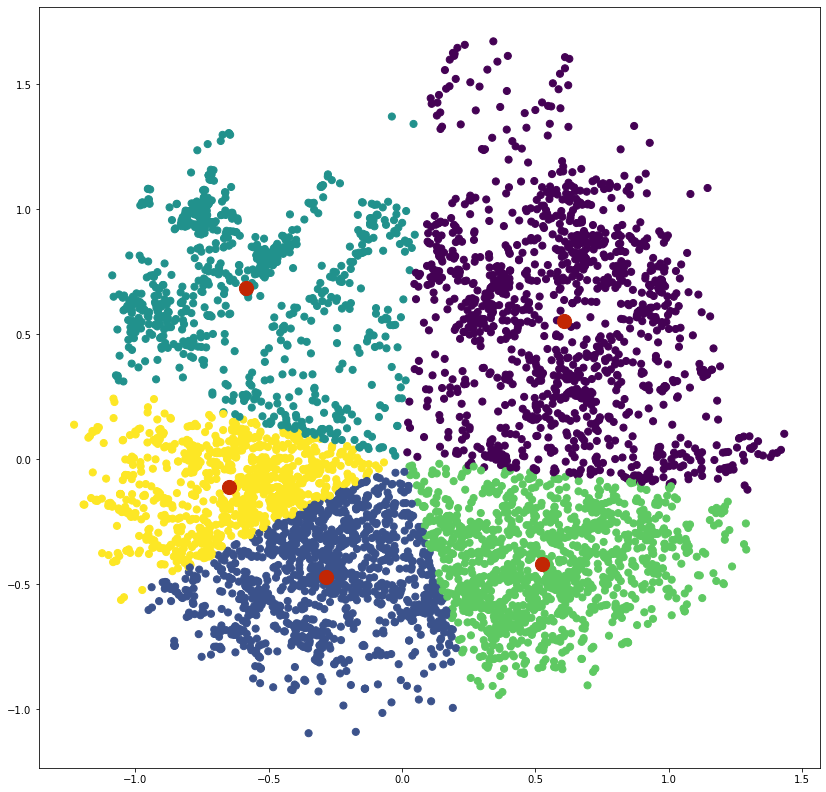

In [522]:
#plt.figure(figsize = (14, 14))
#plt.scatter(dataset_google_reviews_copy_no_rec_pca[:, 0], dataset_google_reviews_copy_no_rec_pca[:, 1], c=labels_ac_no_rec, s=50, cmap='viridis')
#plt.scatter(centroidi_no_rec_pca[:, 0], centroidi_no_rec_pca[:, 1], c='#c22604', s=200);

In [523]:
#proviamo 

In [524]:
#labels_ac_rec = ag.fit_predict(dataset_google_reviews_copy_rec_pca)

In [525]:
#nc.fit(dataset_google_reviews_copy_rec_pca, labels_ac_rec)
#centroidi_rec_pca = nc.centroids_

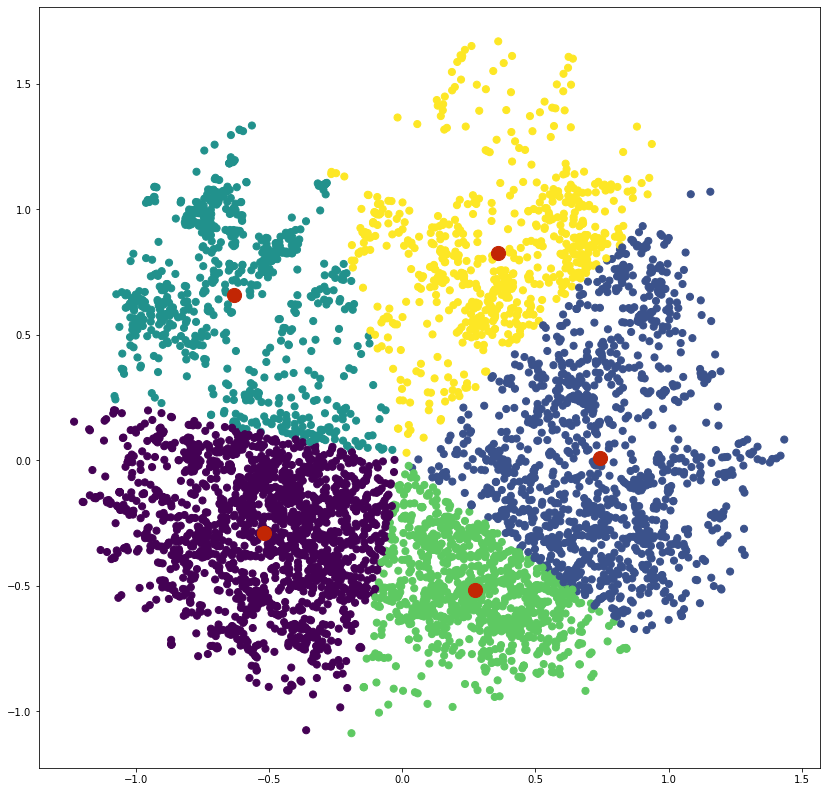

In [526]:
#plt.figure(figsize = (14, 14))
#plt.scatter(dataset_google_reviews_copy_rec_pca[:, 0], dataset_google_reviews_copy_rec_pca[:, 1], c=labels_ac_rec, s=50, cmap='viridis')
#plt.scatter(centroidi_rec_pca[:, 0], centroidi_rec_pca[:, 1], c='#c22604', s=200);

In [527]:
neighbors = NearestNeighbors(n_neighbors=44, metric = 'cosine')
neighbors_fit = neighbors.fit(dataset_google_reviews_copy_no_rec_pca)
distances, indices = neighbors_fit.kneighbors(dataset_google_reviews_copy_no_rec_pca)

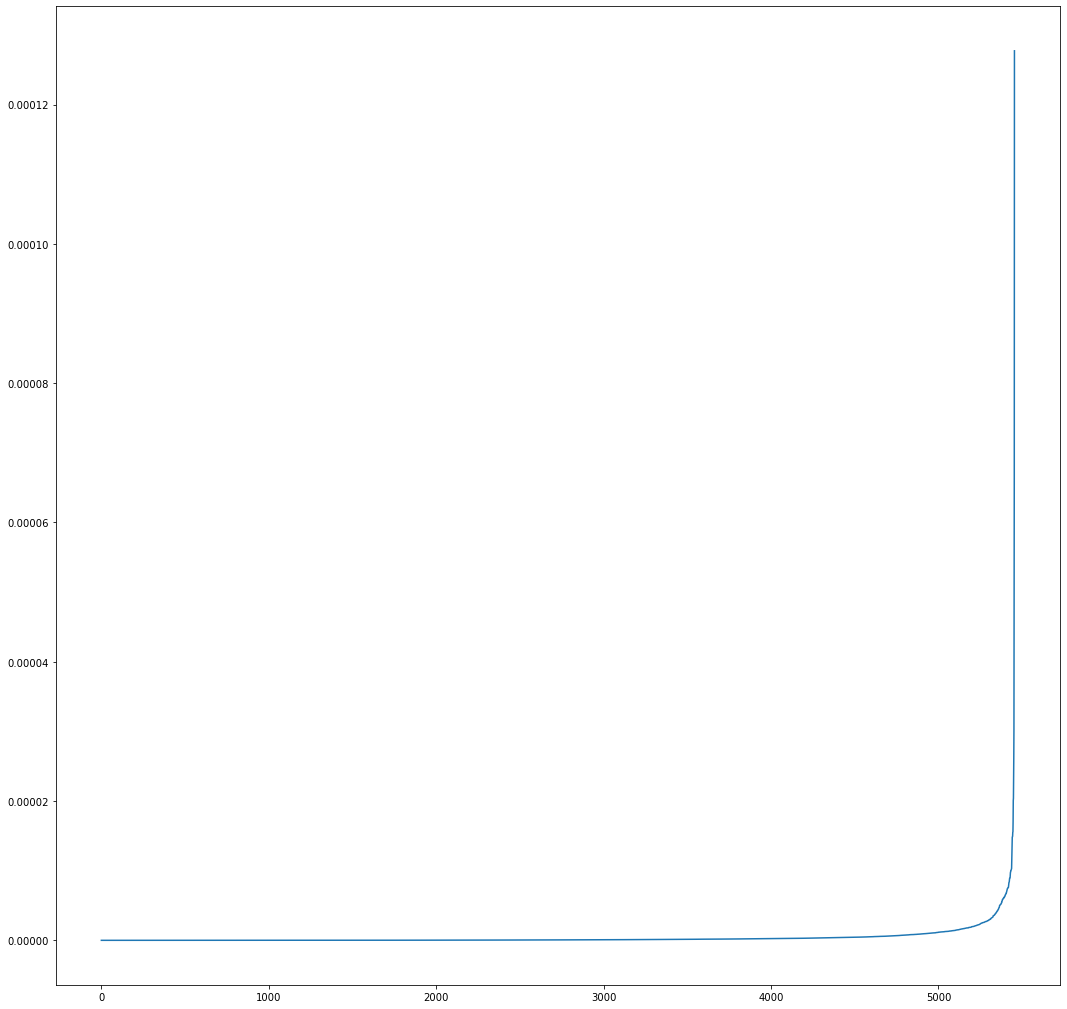

In [528]:
#plt.figure(figsize = (14, 14))
figure = plt.figure(figsize = (18, 18))
axx = plt.subplot()
#axx.set_xlim([5440, 5500])
distances = np.sort(distances, axis=0)
distances_slice = distances[:,1]
axx.plot(distances_slice)

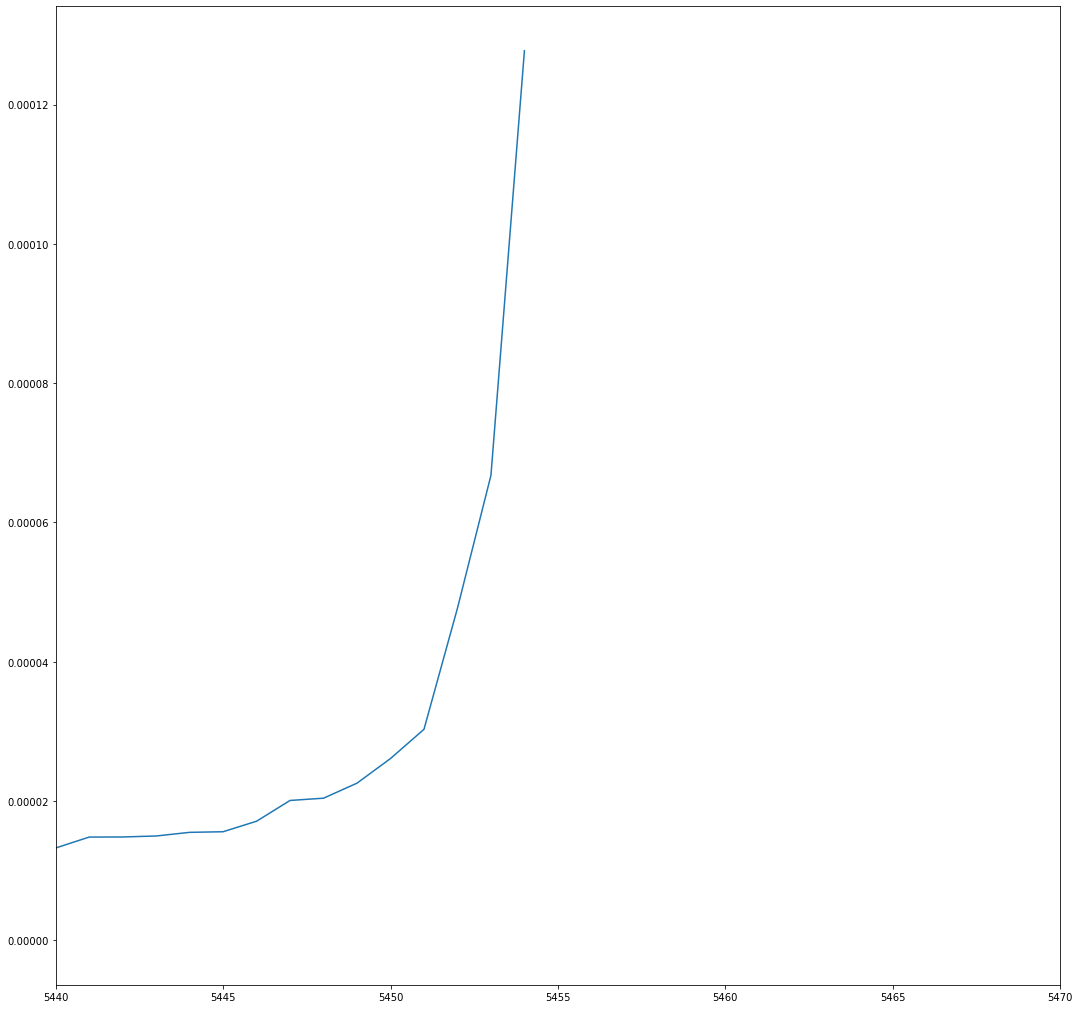

In [529]:
#plt.figure(figsize = (14, 14))
figure = plt.figure(figsize = (18, 18))
axx = plt.subplot()
axx.set_xlim([5440, 5470])
distances = np.sort(distances, axis=0)
distances_slice = distances[:,1]
axx.plot(distances_slice)

In [530]:
clust = OPTICS(min_samples=44, metric='cosine', cluster_method='dbscan', max_eps=0.002)

clust.fit(dataset_google_reviews_copy_no_rec_pca)


# Number of clusters in labels, ignoring noise if present.
#n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
#n_noise_ = list(labels).count(-1)

OPTICS(cluster_method='dbscan', max_eps=0.002, metric='cosine', min_samples=44)

Text(0.5, 1.0, 'OPTICS')

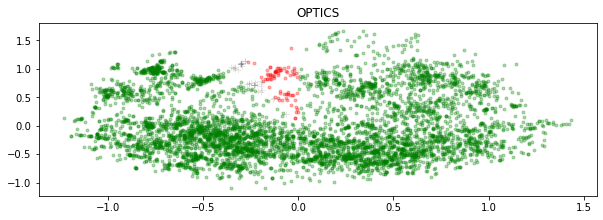

In [531]:
plt.figure(figsize=(10, 7))
G = gridspec.GridSpec(2, 3)
ax2 = plt.subplot(G[0, :])

colors = ["g.", "r.", "b.", "y.", "c."]
for klass, color in zip(range(0, 5), colors):
    Xk = dataset_google_reviews_copy_no_rec_pca[clust.labels_ == klass]
    ax2.plot(Xk[:, 0], Xk[:, 1], color, alpha=0.3)
ax2.plot(dataset_google_reviews_copy_no_rec_pca[clust.labels_ == -1, 0], dataset_google_reviews_copy_no_rec_pca[clust.labels_ == -1, 1], "k+", alpha=0.1)
ax2.set_title("OPTICS")

In [532]:
plt.figure(figsize = (14, 14))
unique_labels = set(labels)
core_samples_mask = np.zeros_like(labels, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True

colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = labels == k

    xy = dataset_google_reviews_copy_no_rec_pca[class_member_mask & core_samples_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=14,
    )

    xy = dataset_google_reviews_copy_no_rec_pca[class_member_mask & ~core_samples_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=6,
    )

plt.title(f"Clusters stimati: {n_clusters_}")
plt.show()

AttributeError: 'OPTICS' object has no attribute 'core_sample_indices_'

<Figure size 1008x1008 with 0 Axes>